### Using CvD stellar population models

Models from the [Conroy and van Dokkum (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...747...69C/abstract) and [Conroy et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJ...854..139C/abstract), a.k.a. CvD models, can be obtained under request to the authors, and are **not** distributed together with `paintbox`. Similar to the MILES models, CvD are also distributed as SSP models with varying ages, metallicities, and IMFs, but also provide response functions that allow the variation of several individual elements, e.g., C, N, O, Mg, Si, Ca, Ti, and Fe. In this cases, To handle these models, we use the utility class `CvD18`, built from the basic `paintbox` classes, to handle the input files and produce spectra with any combination of parameters.

Preparing response functions: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]


Model allowed ranges
{'Z': (-1.5, 0.2), 'Age': (1.0, 13.0), 'x1': (0.5, 3.5), 'x2': (0.5, 3.5), 'Mg': (-0.3, 0.3), 'Na': (-0.3, 0.9)}
List of parameters of model
['Z', 'Age', 'x1', 'x2', 'Mg', 'Na']


Text(0, 0.5, 'Normalized flux')

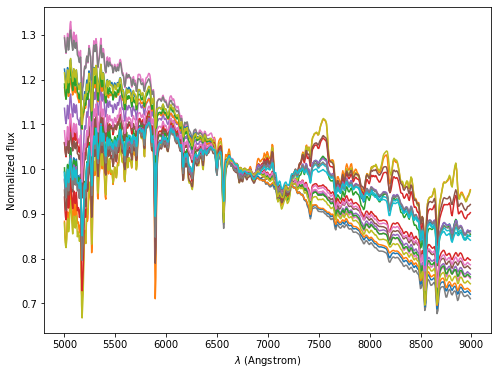

In [2]:
import os

import numpy as np
from paintbox.utils import CvD18, disp2vel
import matplotlib.pyplot as plt

# Defining an arbitrary wavelength region
w1, w2 = 5000, 9000 # Setting the wavelength window
sigma = 300 # Velocity dispersion of the output models
wave = disp2vel([w1, w2], sigma)
outdir = os.path.join(os.getcwd(), "CvD18_tutorials")
elements = ["Mg", "Na"] # Simple model with only two elements
ssp = CvD18(wave, sigma=sigma, store=outdir, elements=elements)
# Plotting n random models
fig = plt.figure(figsize=(8, 6))
n = 20
print("Model allowed ranges")
print(ssp.limits)
print("List of parameters of model")
print(ssp.parnames)
for i in range(n):
    theta = np.array([np.random.uniform(ssp.limits[p][0], ssp.limits[p][1]) 
                      for p in ssp.parnames])
    v = ssp(theta)
    plt.plot(wave, ssp(theta))
plt.xlabel("$\lambda$ (Angstrom)")
plt.ylabel("Normalized flux")
#plt.savefig("../docs/figures/CvD_example.png")

Please check out the documentation for the `CvD18` class to set this class to work in your computer using the `libpath` keyword. 

#### Visualizing response functions

To `CvD18` class allows the access to all response functions used in an instance. Below we use the response function of iron, magnesium and titanium to reproduce figure 8 of [Conroy et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJ...854..139C/abstract).

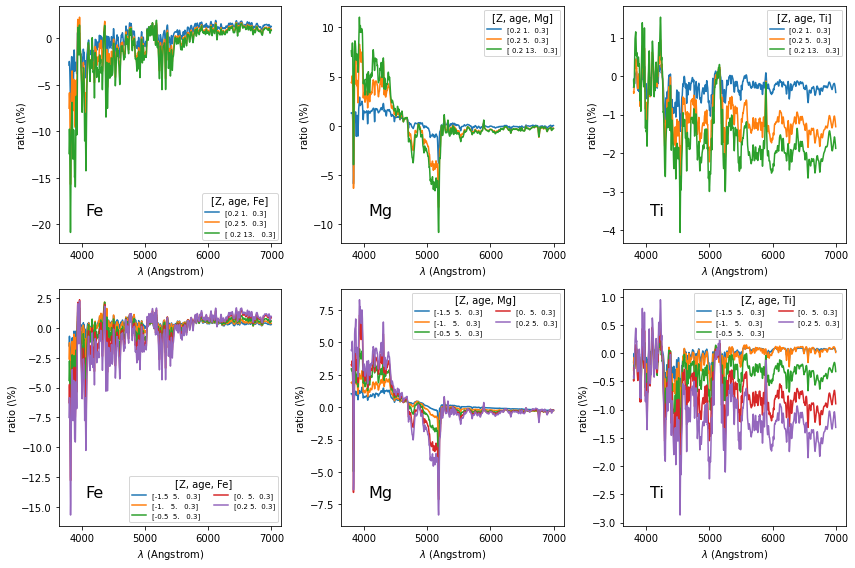

In [48]:
import os 

import numpy as np
import paintbox as pb 
from paintbox.utils import disp2vel, CvD18
import matplotlib.pyplot as plt

wave = disp2vel([3800, 7000], 100)
sigma = 300 # Velocity dispersion of the output models
elements = ["Fe", "Mg", "Ti"]
outdir = os.path.join(os.getcwd(), "CvD18_tutorials")
ssp = CvD18(wave, sigma=sigma, outdir=outdir, elements=elements)
fig = plt.figure(figsize=(12, 8))
for i, element in enumerate(elements):
    rf = ssp.response_functions[element]
    # Upper panels with fixed metallicity
    Z = 0.2
    abund = rf.limits[element][1]
    ages = [1, 5, 13]
    ax = plt.subplot(2, len(elements), i+1)
    for age in ages:
        theta = np.array([Z, age, abund])
        ax.plot(wave, (rf(theta) - 1) * 100, label=f"{theta}")
        ax.legend(title=f"[Z, age, {element}]", prop={"size": 7})
    ax.set_xlabel("$\lambda$ (Angstrom)")
    ax.set_ylabel("ratio (\%)")
    ax.text(0.12, 0.12, element, fontsize=16, transform=ax.transAxes)
    # Lower panels with fixed age
    age = 5
    Zs = [-1.5, -1, -0.5, 0, 0.2]
    ax = plt.subplot(2, len(elements), i+4)
    for Z in Zs:
        theta = np.array([Z, age, abund])
        ax.plot(wave, (rf(theta) - 1) * 100, label=theta)
    ax.set_xlabel("$\lambda$ (Angstrom)")
    ax.set_ylabel("ratio (\%)")
    ax.legend(title=f"[Z, age, {element}]", prop={"size": 7}, ncol=2)
    ax.text(0.12, 0.12, element, fontsize=16, transform=ax.transAxes)
plt.tight_layout()
# plt.savefig("../docs/figures/rfs_Fe_Mg_Ti.png")